<a href="https://colab.research.google.com/github/AnviVerma27/Artificial-Neural-Network/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
(train_img, train_lab),(test_img, test_lab) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_img, test_img = train_img/255.0,test_img/255.0

In [ ]:
train_img

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
class_name = ['airplane','automobiles','bird','cat','deer','dog','frog','horse','ship','truck']

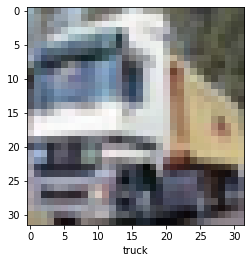

In [ ]:
img_idx = 1
plt.imshow(train_img[img_idx],cmap = plt.cm.binary)
plt.xlabel(class_name[train_lab[img_idx][0]])
plt.show()

In [ ]:
train_img.shape

(50000, 32, 32, 3)

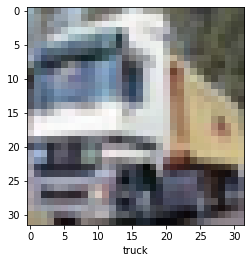

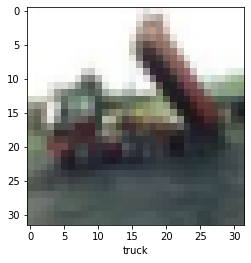

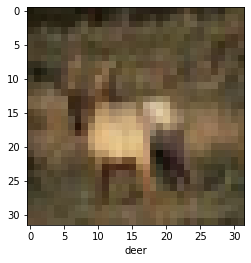

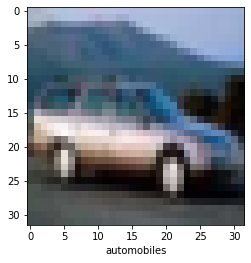

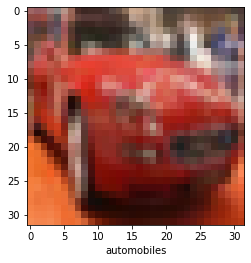

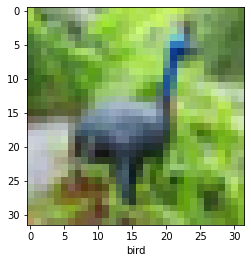

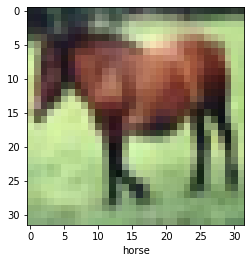

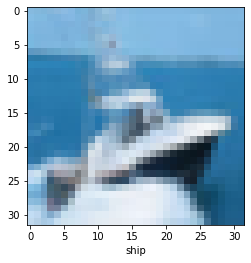

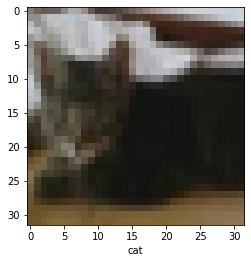

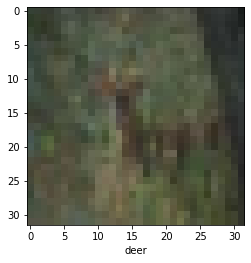

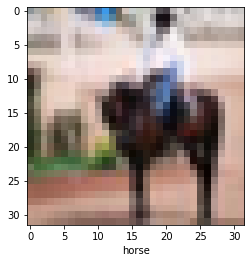

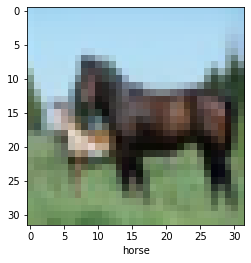

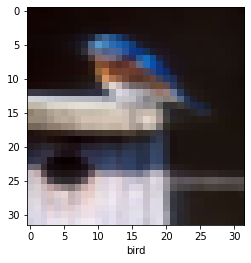

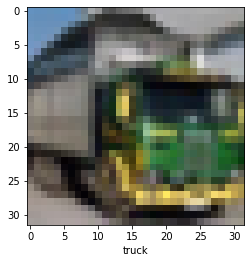

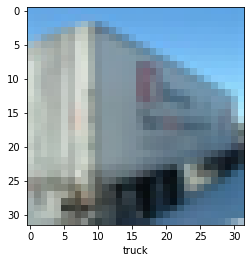

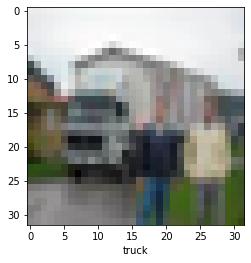

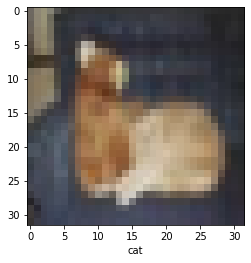

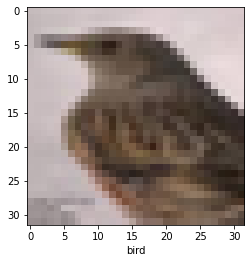

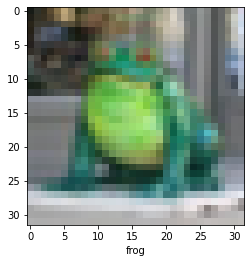

In [ ]:
for img_idx in range (1,20):
  plt.imshow(train_img[img_idx],cmap = plt.cm.binary)
  plt.xlabel(class_name[train_lab[img_idx][0]])
  plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(train_img,train_lab,epochs=5,validation_data=(test_img,test_lab))

Epoch 1/5
1563/1563 [==============================] - 94s 59ms/step - loss: 1.5551 - accuracy: 0.4317 - val_loss: 1.3293 - val_accuracy: 0.5203
Epoch 2/5
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1949 - accuracy: 0.5755 - val_loss: 1.1721 - val_accuracy: 0.5778
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0503 - accuracy: 0.6291 - val_loss: 1.1070 - val_accuracy: 0.6089
Epoch 4/5
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9486 - accuracy: 0.6663 - val_loss: 1.0059 - val_accuracy: 0.6481
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8774 - accuracy: 0.6899 - val_loss: 0.9248 - val_accuracy: 0.6762


In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_lab, verbose=2)

313/313 - 5s - loss: 0.9248 - accuracy: 0.6762 - 5s/epoch - 17ms/step


In [ ]:
test_acc

0.6761999726295471

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_im = train_img[14]
img = tf.keras.preprocessing.image.img_to_array(test_im)
img = img.reshape((1,)+img.shape)

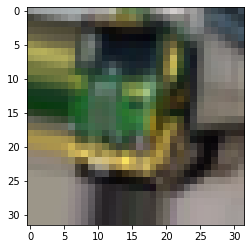

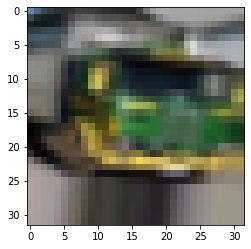

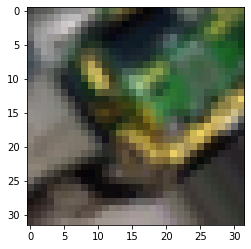

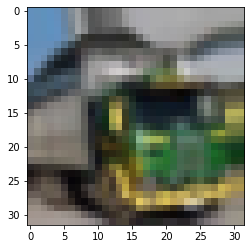

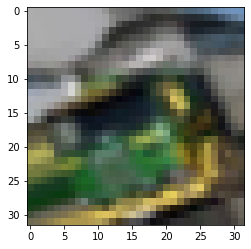

In [ ]:
i=0
for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(tf.keras.preprocessing.image.img_to_array(batch[0]))
  i+=1
  if i>4:
    break
plt.show()